#### Cost function

we will implement and explore the `cost` function for linear regression with one variable.

In [5]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#### Problem Statement 
we would like a model which can predict housing prices given the size of the house.

In [7]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)

#Given data
x_train = np.array([1, 2 , 2.5 , 4, 6 , 3.4 , 1.7 ])
y_train = np.array([ 300, 400, 450, 600, 700, 390, 400])

#### Computing Cost
The equation for cost with one variable or one feature (in our case it's the house area) is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [9]:
"""
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """

def compute_cost(x,y,w,b):
    # m is the number of training examples
    m = x.shape[0]
    f_wb = np.zeros(m)
    cost = 0
    for i in range(m):
        f_wb[i] = w*x[i] + b
        cost = cost + ( f_wb[i] - y[i])**2
    cost = cost/(2*m)
    return cost

In [11]:
total_cost = compute_cost(x_train, y_train, 100,100)
print(f"total cost = {total_cost}")

total cost = 4242.857142857143


`Changing the values of w and b manually in the direction of steepest descent`

In [13]:
total_cost = compute_cost(x_train, y_train, 100,150)
print(f"total cost = {total_cost}")

total cost = 2064.285714285714


In [15]:
total_cost = compute_cost(x_train, y_train, 100,170)
print(f"total cost = {total_cost}")

total cost = 1892.857142857143


In [17]:
total_cost = compute_cost(x_train, y_train, 90,170)
print(f"total cost = {total_cost}")

total cost = 1817.857142857143


In [19]:
total_cost = compute_cost(x_train, y_train, 95,170)
print(f"total cost = {total_cost}")

total cost = 1716.607142857143


In [21]:
total_cost = compute_cost(x_train, y_train, 75,239)
print(f"total cost = {total_cost}")

total cost = 1189.25


In [23]:
from mpl_toolkits.mplot3d import Axes3D

Plotting the Cost curve

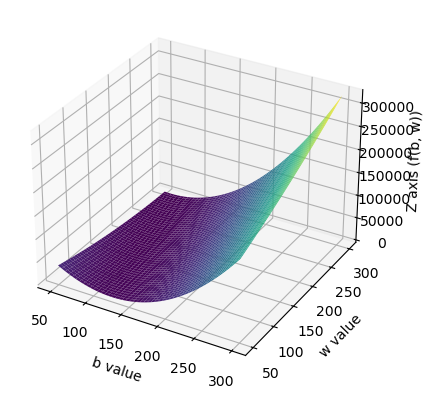

In [33]:
def f(x,y,w,b):
    # m is the number of training examples
    m = x.shape[0]
    f_wb = np.zeros(m)
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + ( f_wb - y[i])**2
    cost = cost/(2*m)
    return cost

# Create grid
temp_b = np.linspace(50, 300, 250)
temp_w = np.linspace(50, 300, 250)
X, Y = np.meshgrid(temp_b, temp_w)
Z = f(x_train, y_train, X, Y)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

#set the labels 
ax.set_xlabel('b value')
ax.set_ylabel('w value')
ax.set_zlabel('Z axis (f(b, w))')

plt.show()


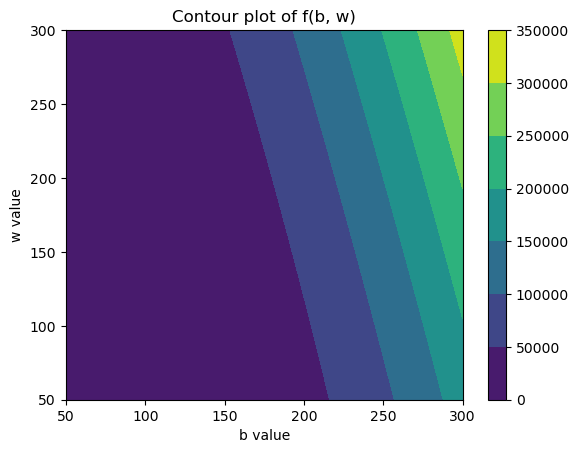

In [35]:
plt.figure()
cp = plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(cp)
plt.xlabel('b value')
plt.ylabel('w value')
plt.title('Contour plot of f(b, w)')
plt.show()


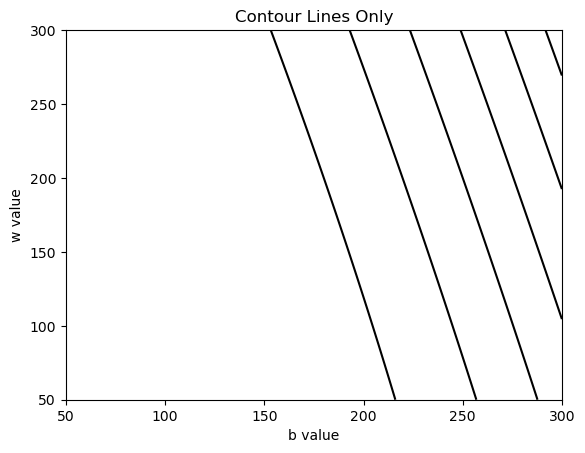

In [37]:
# Plot contour lines (no fill)
plt.contour(X, Y, Z, colors='black')  # Draw lines only, in black
plt.xlabel('b value')
plt.ylabel('w value')
plt.title('Contour Lines Only')
plt.show()

#### Convex Cost surface
The fact that the cost function squares the loss ensures that the `error surface` is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions.